### Сформулируем парадокс Монти Холла:
Вы выбираете случайную дверь из трех, затем ведущий открывает какую-то дверь, за которой нет приза. Стоит ли вам изменить свой выбор?

#### Создадим сначала ведущего: алгоритм, который зная вероятность выбирает дверь, которую нужно открыть и показывает ее игроку.

In [1]:
from random import randint as choice

def host(pick : int, door_with_prize : int):
    if pick in [0, 1, 2]:
        doors_left = [0, 1, 2]
        doors_left.remove(pick)
        if door_with_prize == id:
            return doors_left[choice(0,1)]
        else:
            return doors_left[1] if (door_with_prize == doors_left[0]) else doors_left[0]
        
        

#### Давайте протестируем

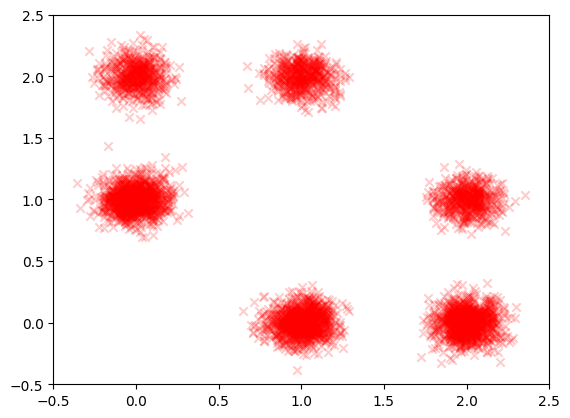

In [2]:
import numpy as np 
from matplotlib import pyplot as plt

n = 5000
picks = np.random.choice([0, 1, 2], n)
doors_with_prizes = np.random.choice([0, 1, 2], n)
merged = np.stack((picks, doors_with_prizes), axis=-1)

host_answers = []

for pick, door in merged:
    host_answers.append(host(pick, door))

scatter_dots = plt.scatter(picks, host_answers, marker='x', color='red', alpha=0.2)

xy = scatter_dots.get_offsets()

scatter_dots.set_offsets(xy + np.random.normal(0, 0.1, size=xy.shape))

plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 2.5)
plt.show()

##### Пусть игрок будет всегда выбирать одну и ту же дверь.
Вероятность выбора каждой из дверей одинакова, а каждая ситуация, где игрок выбрал другую дверь, является перестановкой текущей ситуации, следовательно мы можем не рандомизировать выбор игрока, а закрепить на ним какую-то дверь, например первую(под номером 0)

##### Осталось только как-то определить, будет ли выгодно игроку поменять свой выбор
Будем делать так:  
На вход хосту будем подавать случайную дверь, за которой находится приз, и 0(как выбор игрока)
Затем после ответа от хоста мы проверяем был ли выбор верен.
Если игрок угадал, значит ему не нужно было менять выбор.

In [3]:
n = 5_000_000

should_switch = 0
should_stay = 0

for _ in range(n):
    door = choice(0, 2)
    may_win = [0, 1, 2]
    may_win.remove(host(0, door))
    may_win.remove(0)
    pick = may_win[0]
    if pick == door:
        should_switch += 1
    else :
        should_stay += 1
        
        
print(f'{should_stay=}\n{should_switch=}')
print(should_stay/(should_stay + should_switch))
print(should_switch/(should_stay + should_switch))

should_stay=1665292
should_switch=3334708
0.3330584
0.6669416


И теперь непонятно, зачем я это все делал, если все очевидно  
:(

In [4]:
n = 5_000_000

should_switch = 0
should_stay = 0

for _ in range(n):
    first_pick = choice(0, 2)
    door = choice(0, 2)
    may_win = [0, 1, 2]
    opened_door = host(first_pick, door)
    may_win.remove(opened_door)
    may_win.remove(first_pick)
    
    second_pick = may_win[0]
    if not (first_pick == door):
        should_switch += 1
    else:
        should_stay += 1
        
        
print(f'{should_stay=}\n{should_switch=}')
print(should_stay/(should_stay + should_switch))
print(should_switch/(should_stay + should_switch))

should_stay=1667062
should_switch=3332938
0.3334124
0.6665876
